# <font color='blue'>LOAN STATUS PREDICTION<font/>

# <font color='red'>4)MODELLING<font/>

- Defining function to select best model

In [234]:
class Best_Model_Selector:
    '''this class help to select
    suitable model for given data frame
    the models used are
    a) Logistic regression
    b)KNN classifier
    c)Decision tree
    d)Random forest
    e)Adaboostclassifier
    f)gradient boost classifier
    g)xgboost classifier'''
    def __init__(self,model_object_list):
        self.model_used=model_object_list
    
    
    def model_selector(self,dataframe,label):
#         --scaling the data---
        dataframe_scaled=pd.DataFrame(data=zscore(dataframe.drop(label,axis=1)),columns=dataframe.drop(label,axis=1).columns)
#       ------Defining X and y------
        x=dataframe_scaled
        y=dataframe[label]
#         -------splitting data-------
        x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42)
#         ------- initiating model accuracy dataframe---------
        model_performance=pd.DataFrame({'model_name':[],'train_accuracy':[],'test_accuracy':[]})
#         --------- fitting different models---------
        ind=0
        for Model in self.model_used:
            if ind==len(self.model_used)-1:
                model=Model()
                model.fit(x_train.values,y_train)
                train_accuracy=model.score(x_train.values,y_train)
                test_accuracy=model.score(x_test.values,y_test)
                model_performance.loc[ind]=[str(Model),train_accuracy,test_accuracy]
                print(self.model_used[ind],'model fitted')
                ind+=1
            else:
                model=Model()
                model.fit(x_train,y_train)
                train_accuracy=model.score(x_train,y_train)
                test_accuracy=model.score(x_test,y_test)
                model_performance.loc[ind]=[str(Model),train_accuracy,test_accuracy]
                print(self.model_used[ind],'model fitted')
                ind+=1

            
        return model_performance
            
        
        
    

In [235]:
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [165]:
model_list=[LinearRegression,KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier,AdaBoostClassifier,
           GradientBoostingClassifier,XGBClassifier]

In [236]:
#  reading data
df=pd.read_csv('balanced_train_data.csv')
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose

In [237]:
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,732.0,1219961.5,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,1
2,789250.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,732.0,1219961.5,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,1


In [170]:
# calling model selction class
m=Best_Model_Selector(model_list)

m.model_selector(df,'Loan Status')

<IPython.core.display.Javascript object>

<class 'sklearn.linear_model._base.LinearRegression'> model fitted
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> model fitted
<class 'sklearn.tree._classes.DecisionTreeClassifier'> model fitted
<class 'sklearn.ensemble._forest.RandomForestClassifier'> model fitted
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> model fitted
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> model fitted
[14:16:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<class 'xgboost.sklearn.XGBClassifier'> model fitted


,model_name,train_accuracy,test_accuracy
0,<class 'sklearn.linear_model._base.LinearRegression'>,0.392883,0.388065
1,<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,0.848282,0.774259
2,<class 'sklearn.tree._classes.DecisionTreeClassifier'>,1.000000,0.793026
3,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,1.000000,0.842756
4,<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>,0.819463,0.816442
5,<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>,0.825663,0.822473
6,<class 'xgboost.sklearn.XGBClassifier'>,0.885973,0.845586


### Lets see can we get the better accuracy with selected features only?

In [171]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose

In [173]:
selected_features=['Annual Income','Home Ownership_Home Mortgage','Credit Score','Current Loan Amount',
                  'Home Ownership_Rent','Home Ownership_Own Home','Term_Short Term','Years in current job_10+ years',
                  'Purpose_Debt Consolidation','Monthly Debt','Current Credit Balance','Number of Credit Problems',
                  'Maximum Open Credit','Years in current job_2 years','Years in current job_3 years','Number of Open Accounts',
                  'Years of Credit History','Years in current job_< 1 year','Months since last delinquent',
                  'Years in current job_4 years']
len(selected_features)

20

In [175]:
# calling model selction class
sel_features=selected_features+['Loan Status']
m=Best_Model_Selector(model_list)

m.model_selector(df[sel_features],'Loan Status')

<IPython.core.display.Javascript object>

<class 'sklearn.linear_model._base.LinearRegression'> model fitted
<class 'sklearn.neighbors._classification.KNeighborsClassifier'> model fitted
<class 'sklearn.tree._classes.DecisionTreeClassifier'> model fitted
<class 'sklearn.ensemble._forest.RandomForestClassifier'> model fitted
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> model fitted
<class 'sklearn.ensemble._gb.GradientBoostingClassifier'> model fitted
[14:40:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<class 'xgboost.sklearn.XGBClassifier'> model fitted


,model_name,train_accuracy,test_accuracy
0,<class 'sklearn.linear_model._base.LinearRegression'>,0.324061,0.321010
1,<class 'sklearn.neighbors._classification.KNeighborsClassifier'>,0.837433,0.757210
2,<class 'sklearn.tree._classes.DecisionTreeClassifier'>,1.000000,0.785815
3,<class 'sklearn.ensemble._forest.RandomForestClassifier'>,1.000000,0.836624
4,<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>,0.810063,0.807480
5,<class 'sklearn.ensemble._gb.GradientBoostingClassifier'>,0.823102,0.816779
6,<class 'xgboost.sklearn.XGBClassifier'>,0.890487,0.845620


## Final model selection

- so we will go for xgboost with hyperparameter tunings with selected features

In [176]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [177]:
x=df[sel_features]
y=df['Loan Status']

In [190]:
%%time
m=XGBClassifier( )
p={'n_estimators':range(10,50),'max_depth':range(2,10)}
grid=RandomizedSearchCV(estimator=m,param_distributions=p,cv=5,)
grid.fit(x.values,y)
grid.best_params_

[15:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[15:47:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

{'n_estimators': 12, 'max_depth': 4}

In [204]:
m=XGBClassifier()
m.fit(x_train.values,y_train)
print('train',m.score(x_train.values,y_train))
print('test',m.score(x_test.values,y_test))

[15:50:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train 0.8859725965858042
test 0.8455862533692723


- We will go with default XGBClassifier, we are able to achive 84% accuracy

## Does clustering helps to increase the accuracy?

In [214]:
df=pd.read_csv(r'balanced_train_data.csv')
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,732.0,1219961.5,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,1
2,789250.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,732.0,1219961.5,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,1


In [207]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [215]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose

In [218]:
%%time
df1=pd.DataFrame(data=zscore(df.drop('Loan Status',axis=1)),columns=df.drop('Loan Status',axis=1).columns)
k=[]
wcss=[]
sl_score=[]
for i in range(2,15):
    model=KMeans(n_clusters=i)
    pred=model.fit_predict(df1)
    k.append(i)
    wcss.append(model.inertia_)
    sl_score.append(silhouette_score(X=df1,labels=pred))
    print(i)
    

2
3
4
5
6
7
8
9
10
11
12
13
14
Wall time: 55min 53s


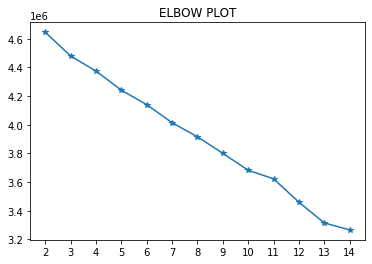

In [219]:
plt.plot(k,wcss,marker='*')
plt.xticks(range(2,15),range(2,15))
plt.title('ELBOW PLOT')
plt.show()


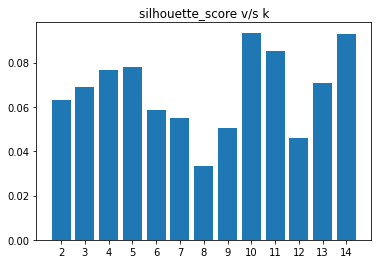

In [220]:
plt.bar(x=k,height=sl_score)
plt.title('silhouette_score v/s k')
plt.xticks(range(2,15),range(2,15))
plt.show()

- We will go with three as optimum numer of clusters

## NOT GOOD FOR CLUSTERING

### loading into pickle file the xgboost final model

In [243]:
df=pd.read_csv('balanced_train_data.csv')
df.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,732.0,1219961.5,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,1
2,789250.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,732.0,1219961.5,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,1


In [246]:
selected_features=['Annual Income','Home Ownership_Home Mortgage','Credit Score','Current Loan Amount',
                  'Home Ownership_Rent','Home Ownership_Own Home','Term_Short Term','Years in current job_10+ years',
                  'Purpose_Debt Consolidation','Monthly Debt','Current Credit Balance','Number of Credit Problems',
                  'Maximum Open Credit','Years in current job_2 years','Years in current job_3 years','Number of Open Accounts',
                  'Years of Credit History','Years in current job_< 1 year','Months since last delinquent',
                  'Years in current job_4 years']
len(selected_features)

20

In [247]:
x=df[selected_features]
y=df['Loan Status']

In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

<IPython.core.display.Javascript object>

In [262]:
model=XGBClassifier()
model.fit(x_train.values,y_train)
print('train',model.score(x_train.values,y_train))
print('test',model.score(x_test.values,y_test))

[23:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train 0.888510781671159
test 0.8476415094339622


In [257]:
x_train.iloc[0].values

array([7.91637183e+05, 0.00000000e+00, 7.37720500e+02, 4.02002997e+05,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.39440115e+04, 4.02190557e+05, 0.00000000e+00,
       6.58542753e+05, 0.00000000e+00, 0.00000000e+00, 9.88200186e+00,
       3.03397210e+01, 0.00000000e+00, 3.09192493e+01, 0.00000000e+00])

In [272]:
a=np.array([7.91637183e+05, 0.00000000e+00, 7.37720500e+02, 4.02002997e+05,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.39440115e+04, 4.02190557e+05, 0.00000000e+00,
       6.58542753e+05, 0.00000000e+00, 0.00000000e+00, 9.88200186e+00,
       3.03397210e+01, 0.00000000e+00, 3.09192493e+01, 0.00000000e+00])

a=a.reshape(1,20)

model.predict(a)[0]

0

In [255]:
import pickle

file=open('capstone_project_loan_status.pkl','wb')

pickle.dump(model,file)
file.close()

In [252]:
x_train.columns

Index(['Annual Income', 'Home Ownership_Home Mortgage', 'Credit Score',
       'Current Loan Amount', 'Home Ownership_Rent', 'Home Ownership_Own Home',
       'Term_Short Term', 'Years in current job_10+ years',
       'Purpose_Debt Consolidation', 'Monthly Debt', 'Current Credit Balance',
       'Number of Credit Problems', 'Maximum Open Credit',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Number of Open Accounts', 'Years of Credit History',
       'Years in current job_< 1 year', 'Months since last delinquent',
       'Years in current job_4 years'],
      dtype='object')

In [1]:
df=pd.read_csv(r'balanced_train_data.csv')
df.head()

<IPython.core.display.Javascript object>

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,...,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Loan Status
0,445412.0,709.0,1167493.0,5214.74,17.2,32.0,6.0,1.0,228190.0,416746.0,...,0,0,0,0,0,0,0,0,0,1
1,262328.0,732.0,1219961.5,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,...,0,0,0,0,0,0,0,0,0,1
2,789250.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,...,0,0,0,0,0,0,0,0,0,1
3,347666.0,721.0,806949.0,8741.90,12.0,32.0,9.0,0.0,256329.0,386958.0,...,0,0,0,0,0,0,0,0,0,1
4,176220.0,732.0,1219961.5,20639.70,6.1,32.0,15.0,0.0,253460.0,427174.0,...,0,0,0,0,0,0,0,0,0,1


In [2]:
df.columns

Index(['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens', 'Term_Short Term', 'Years in current job_10+ years',
       'Years in current job_2 years', 'Years in current job_3 years',
       'Years in current job_4 years', 'Years in current job_5 years',
       'Years in current job_6 years', 'Years in current job_7 years',
       'Years in current job_8 years', 'Years in current job_9 years',
       'Years in current job_< 1 year', 'Home Ownership_Home Mortgage',
       'Home Ownership_Own Home', 'Home Ownership_Rent', 'Purpose_Buy House',
       'Purpose_Buy a Car', 'Purpose_Debt Consolidation',
       'Purpose_Educational Expenses', 'Purpose_Home Improvements',
       'Purpose_Medical Bills', 'Purpose_Other', 'Purpose_Take a Trip',
       'Purpose

<IPython.core.display.Javascript object>

C:\Users\HP\anaconda3_new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Loan Status', ylabel='count'>

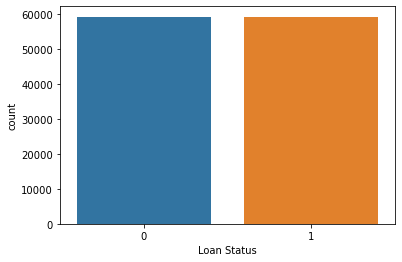

In [3]:
sns.countplot(df['Loan Status'])